In [1]:
#importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
plt.style.use('fivethirtyeight')

In [2]:
#load and store the data in data frame
df = pd.read_csv("filepath")
df.head()

,Year,growth rate,Total Number(TN),TN by Air,TN by Land,Average stay(days)
0,1964,30.9,9526,8435,1091,NaN
1,1965,-1.4,9388,8303,1085,NaN
2,1966,33.9,12567,11206,1361,NaN
3,1967,44.0,18093,15064,3029,NaN
4,1968,33.8,24209,19717,4492,NaN


In [3]:
#fill the null values of column 'Average stay(days)' with mean value
df = df.fillna(df['Average stay(days)'].mean())

# removing last two data considering them as outlier
df.iloc[:-2,:].head()

,Year,growth rate,Total Number(TN),TN by Air,TN by Land,Average stay(days)
0,1964,30.9,9526,8435,1091,11.711087
1,1965,-1.4,9388,8303,1085,11.711087
2,1966,33.9,12567,11206,1361,11.711087
3,1967,44.0,18093,15064,3029,11.711087
4,1968,33.8,24209,19717,4492,11.711087


In [4]:
#find the correlation table to see the dependencies of each variable
df.corr()

,Year,growth rate,Total Number(TN),TN by Air,TN by Land,Average stay(days)
Year,1.000000,-0.311650,0.911526,0.894950,0.896997,0.075047
growth rate,-0.311650,1.000000,-0.149084,-0.153775,-0.121553,0.174246
Total Number(TN),0.911526,-0.149084,1.000000,0.994911,0.939557,0.235275
TN by Air,0.894950,-0.153775,0.994911,1.000000,0.900277,0.217928
TN by Land,0.896997,-0.121553,0.939557,0.900277,1.000000,0.275931
Average stay(days),0.075047,0.174246,0.235275,0.217928,0.275931,1.000000


In [5]:
#plot the linear regression line and Total Number(TN)
df3 = df.iloc[:-2 , :].copy()
#create new column called 'Numbers' that ranges from 0 to length of dataset
df3['Numbers'] = list(range(0,len(df3)))
#storing the 'Numbers' column into a variable called 'X' in an array
X = np.array(df3[['Numbers']])
#storing the 'Total Number(TN)' as an array in variable 'y'
y = df3['Total Number(TN)'].values
#creating and training the model 
lin_model = LinearRegression().fit(X,y)
print('Intercept: ', lin_model.intercept_)
print('Slope: ', lin_model.coef_)

Intercept:  -64524.28754208755
Slope:  [14170.39519726]


Text(0.5, 1.0, 'Immi Data')

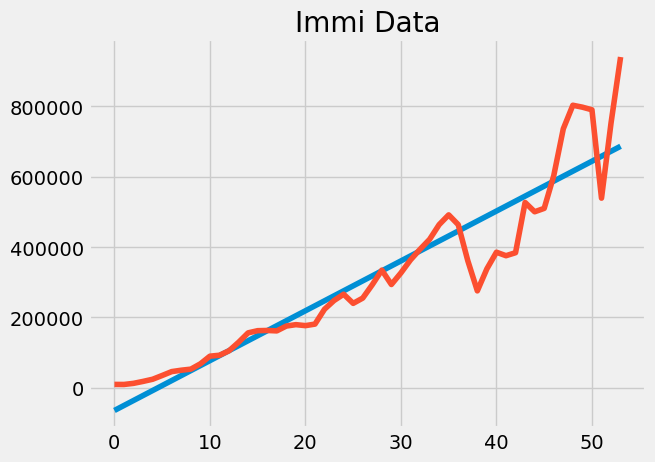

In [6]:
#prepare the data for visualization
#get the predicted Total numbers from the model and store them in variable called 'y_prediction'
y_prediction = lin_model.coef_ * X + lin_model.intercept_ #y=mx+b
#store a predicted values in a new column called 'Prediction'
df3['Prediction'] = y_prediction
#plot the data 
df3['Prediction'].plot()
df3['Total Number(TN)'].plot()
plt.title('Immi Data')

In [7]:
#how good is the model?
r2_score(df3['Total Number(TN)'], df3['Prediction'])

0.8792211123318627

In [8]:
#show possible 'Total Number(TN)' for next year
lin_model.coef_ * len(df3)+1 + lin_model.intercept_

array([700678.05310971])

In [9]:
#plot the linear regression line and TN by Air
df3 = df.iloc[:-2 , :].copy()
#create new column called 'Numbers' that ranges from 0 to length of dataset
df3['Numbers'] = list(range(0,len(df3)))
#storing the 'Numbers' column into a variable called 'X' in an array
X = np.array(df3[['Numbers']])
#storing the 'Total Number(TN)' as an array in variable 'y'
y = df3['TN by Air'].values
#creating and training the model 
lin_model = LinearRegression().fit(X,y)
print('Intercept: ', lin_model.intercept_)
print('Slope: ', lin_model.coef_)

Intercept:  -34315.1414141414
Slope:  [10702.75586049]


Text(0.5, 1.0, 'Immi Data')

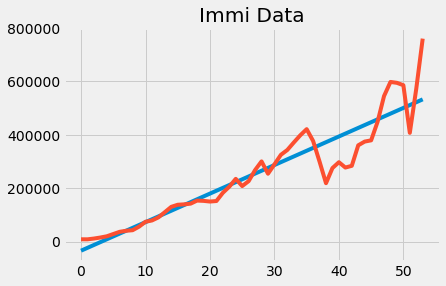

In [10]:
#prepare the data for visualization
#get the predicted Total numbers from the model and store them in variable called 'y_prediction'
y_prediction = lin_model.coef_ * X + lin_model.intercept_ #y=mx+b
#store a predicted values in a new column called 'Prediction'
df3['Prediction'] = y_prediction
#plot the data 
df3['Prediction'].plot()
df3['TN by Air'].plot()
plt.title('Immi Data')

In [11]:
#how good is the model?
r2_score(df3['TN by Air'], df3['Prediction'])

0.8696448353323645

In [12]:
#show possible 'Total Number(TN)' for next year
lin_model.coef_ * len(df3)+1 + lin_model.intercept_

array([543634.67505241])

In [13]:
#plot the linear regression line and TN by Land
df3 = df.iloc[:-2 , :].copy()
#create new column called 'Numbers' that ranges from 0 to length of dataset
df3['Numbers'] = list(range(0,len(df3)))
#storing the 'Numbers' column into a variable called 'X' in an array
X = np.array(df3[['Numbers']])
#storing the 'Total Number(TN)' as an array in variable 'y'
y = df3['TN by Land'].values
#creating and training the model 
lin_model = LinearRegression().fit(X,y)
print('Intercept: ', lin_model.intercept_)
print('Slope: ', lin_model.coef_)

Intercept:  -30209.146127946115
Slope:  [3467.63933676]


Text(0.5, 1.0, 'Immi Data')

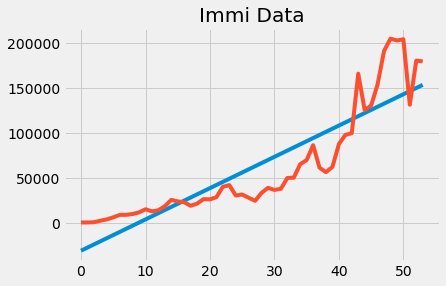

In [14]:
#prepare the data for visualization
#get the predicted Total numbers from the model and store them in variable called 'y_prediction'
y_prediction = lin_model.coef_ * X + lin_model.intercept_ #y=mx+b
#store a predicted values in a new column called 'Prediction'
df3['Prediction'] = y_prediction
#plot the data 
df3['Prediction'].plot()
df3['TN by Land'].plot()
plt.title('Immi Data')

In [15]:
#how good is the model?
r2_score(df3['TN by Land'], df3['Prediction'])

0.7839934293347512

In [16]:
#show possible 'Total Number(TN)' for next year
lin_model.coef_ * len(df3)+1 + lin_model.intercept_

array([157044.3780573])

In [17]:
#plot the linear regression line and Average stay(days)
df3 = df.iloc[:-2 , :].copy()
#create new column called 'Numbers' that ranges from 0 to length of dataset
df3['Numbers'] = list(range(0,len(df3)))
#storing the 'Numbers' column into a variable called 'X' in an array
X = np.array(df3[['Numbers']])
#storing the 'Total Number(TN)' as an array in variable 'y'
y = df3['Average stay(days)'].values
#creating and training the model 
lin_model = LinearRegression().fit(X,y)
print('Intercept: ', lin_model.intercept_)
print('Slope: ', lin_model.coef_)



Intercept:  11.621115356463184
Slope:  [0.00222267]


Text(0.5, 1.0, 'Immi Data')

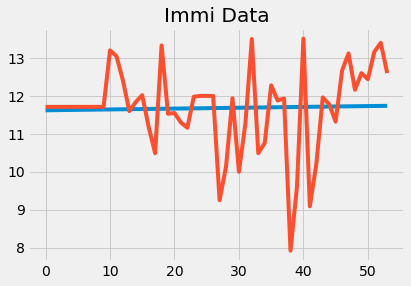

In [18]:
#prepare the data for visualization
#get the predicted Total numbers from the model and store them in variable called 'y_prediction'
y_prediction = lin_model.coef_ * X + lin_model.intercept_ #y=mx+b
#store a predicted values in a new column called 'Prediction'
df3['Prediction'] = y_prediction
#plot the data 
df3['Prediction'].plot()
df3['Average stay(days)'].plot()
plt.title('Immi Data')


In [19]:
#how good is the model?
r2_score(df3['Average stay(days)'], df3['Prediction'])

0.00093752659978108

In [20]:
#show possible 'Total Number(TN)' for next year
lin_model.coef_ * len(df3)+1 + lin_model.intercept_

array([12.74113952])

In [21]:
#plot the linear regression line and growth rate 
df3 = df.iloc[:-2 , :].copy()
#create new column called 'Numbers' that ranges from 0 to length of dataset
df3['Numbers'] = list(range(0,len(df3)))
#storing the 'Numbers' column into a variable called 'X' in an array
X = np.array(df3[['Numbers']])
#storing the 'Total Number(TN)' as an array in variable 'y'
y = df3['growth rate'].values
#creating and training the model 
lin_model = LinearRegression().fit(X,y)
print('Intercept: ', lin_model.intercept_)
print('Slope: ', lin_model.coef_)


Intercept:  21.682154882154883
Slope:  [-0.37095483]


Text(0.5, 1.0, 'Immi Data')

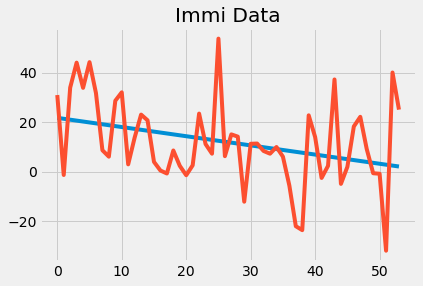

In [22]:

#prepare the data for visualization
#get the predicted Total numbers from the model and store them in variable called 'y_prediction'
y_prediction = lin_model.coef_ * X + lin_model.intercept_ #y=mx+b
#store a predicted values in a new column called 'Prediction'
df3['Prediction'] = y_prediction
#plot the data 
df3['Prediction'].plot()
df3['growth rate'].plot()
plt.title('Immi Data')


In [23]:

#how good is the model?
r2_score(df3['growth rate'], df3['Prediction'])


0.11382014179011646

In [24]:

#show possible 'Total Number(TN)' for next year
lin_model.coef_ * len(df3)+1 + lin_model.intercept_

array([2.65059399])